# Prediction of Santander Customer Transaction


#### Problem Statement:
We need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.
- Classification: The target variable is a binary variable, 0 (will make a specific transaction in the future), 1 (will not make a specific transaction in the future)

#### Exploratory Data Analysis (EDA)


##### Loading Libraries

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# import the necessary modelling algos.

#classification.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from pdpbox import pdp, get_dataset, info_plots

from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

#model selection
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

#Imbalanced data handling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler

#evaluation metrics
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
! pip install scikit-plot
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve


random_state=101
np.random.seed(random_state)

### Loading dataset

In [2]:
os.chdir("F:\EdwisorVanusha\Project\Santander")
os.getcwd()

'F:\\EdwisorVanusha\\Project\\Santander'

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

##### Pandas_profiling
Pandas Profiling is python package whichis a simple and fast way to perform exploratory data analysis of a Pandas Dataframe.
Essentials: type, unique values, missing values, Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range’ Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness, Most frequent values, Histogram, Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices, Missing values matrix, count, heatmap and dendrogram of missing values

In [4]:
#view profile report generated in the saved as a html file
#pfr.to_file("profile.html")

In [5]:
#Shape of the train dataset
train.shape

(200000, 202)

In [6]:
#Shape of the test dataset
test.shape

(200000, 201)

In [7]:
#Summary of the dataset
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


### Class distribution

Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64


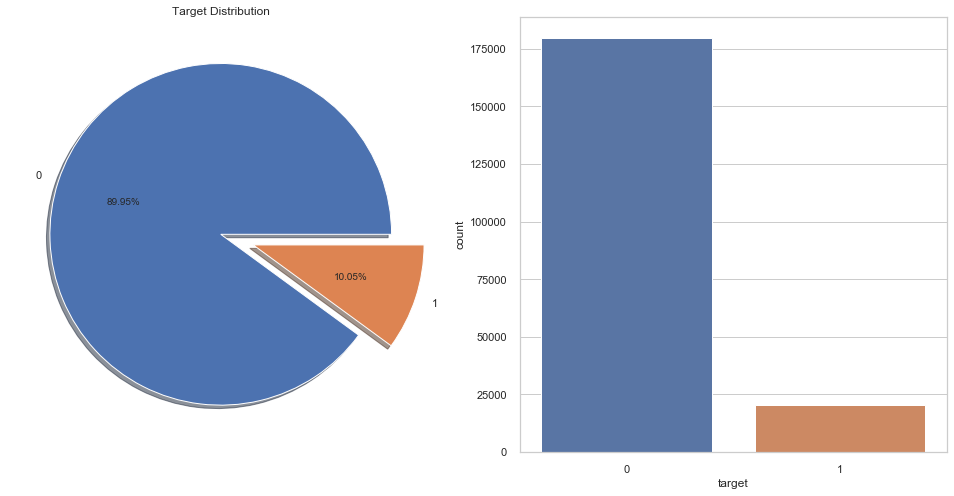

In [9]:
#target classes count
target_class=train['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train['target'].value_counts()/len(train)*100
print('percentage of count of target classes :\n',per_target_class)

##Count and pie chart to visualise 'target' class
f,ax=plt.subplots(1,2,figsize=(15,8))

train['target'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target Distribution')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
plt.show()

Findings:
Target variable has imbalanced class distribution where the number of observations belonging to one class is significantly lower than those belonging to the other class. Above visualisation shows that 89.95% of customers will not make the transaction (belong to "0") and 10.05% of customers make the transaction (belong to "1") at Santander

### Distributions of predictor variables

Let's look at the predictor variables and see how the variables are distributed.

###### Predictor variables in train dataset 

In [10]:
#Distribution of Independent Variables
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

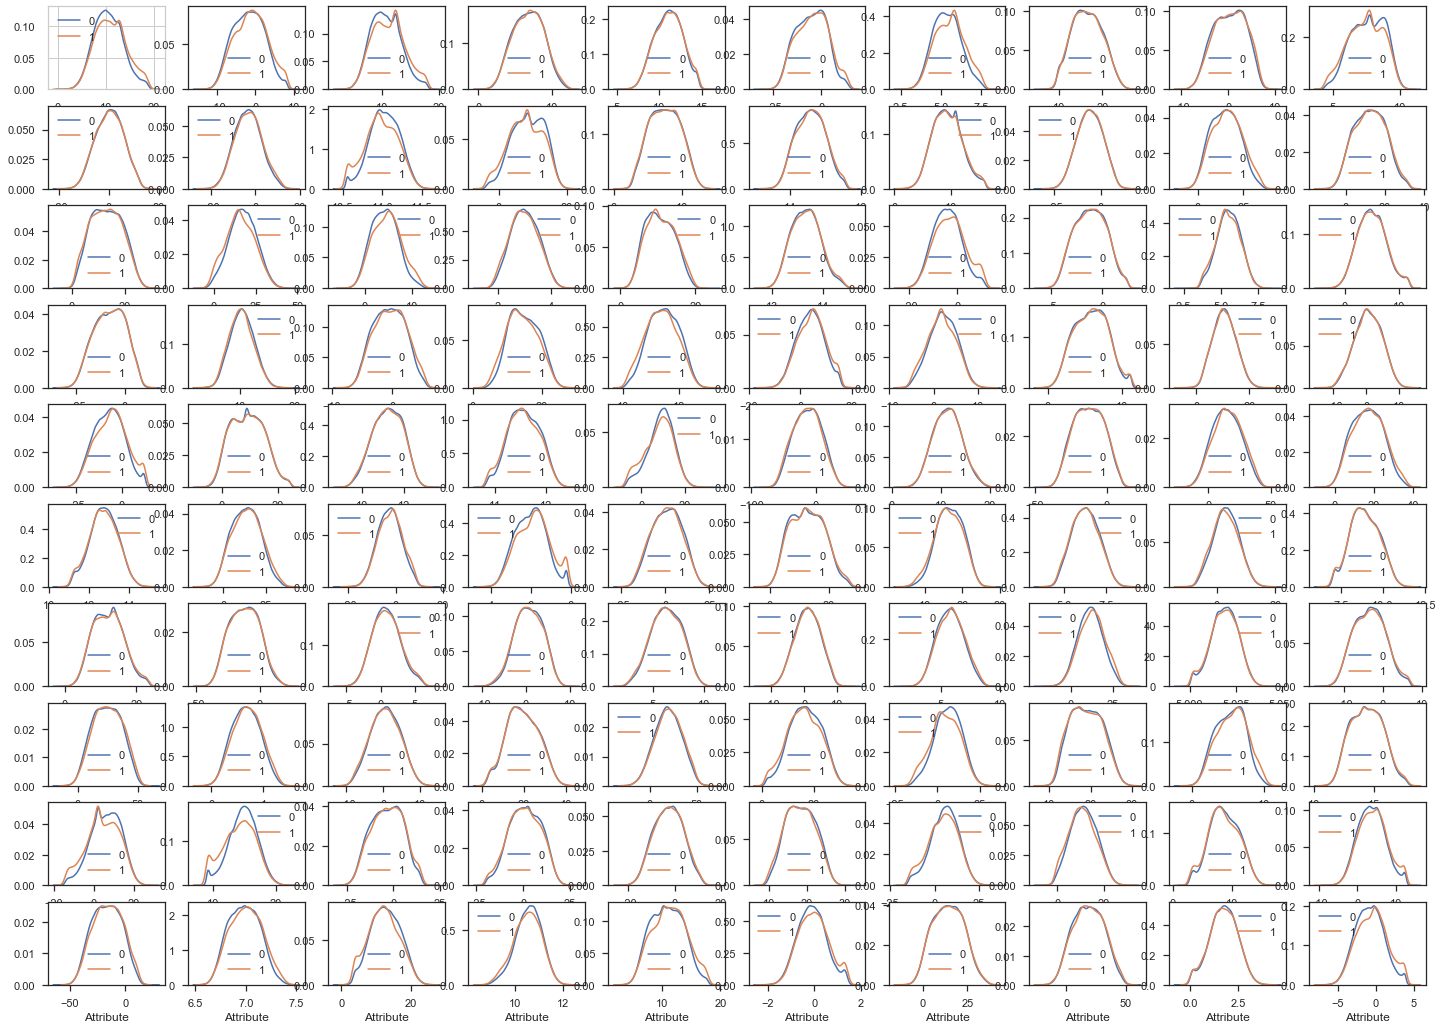

In [11]:
#corresponding to negative class
t0=train[train.target.values==0]
#corresponding to positive class
t1=train[train.target.values==1]
#train attributes from 2 to 102
train_attributes=train.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

<Figure size 432x288 with 0 Axes>

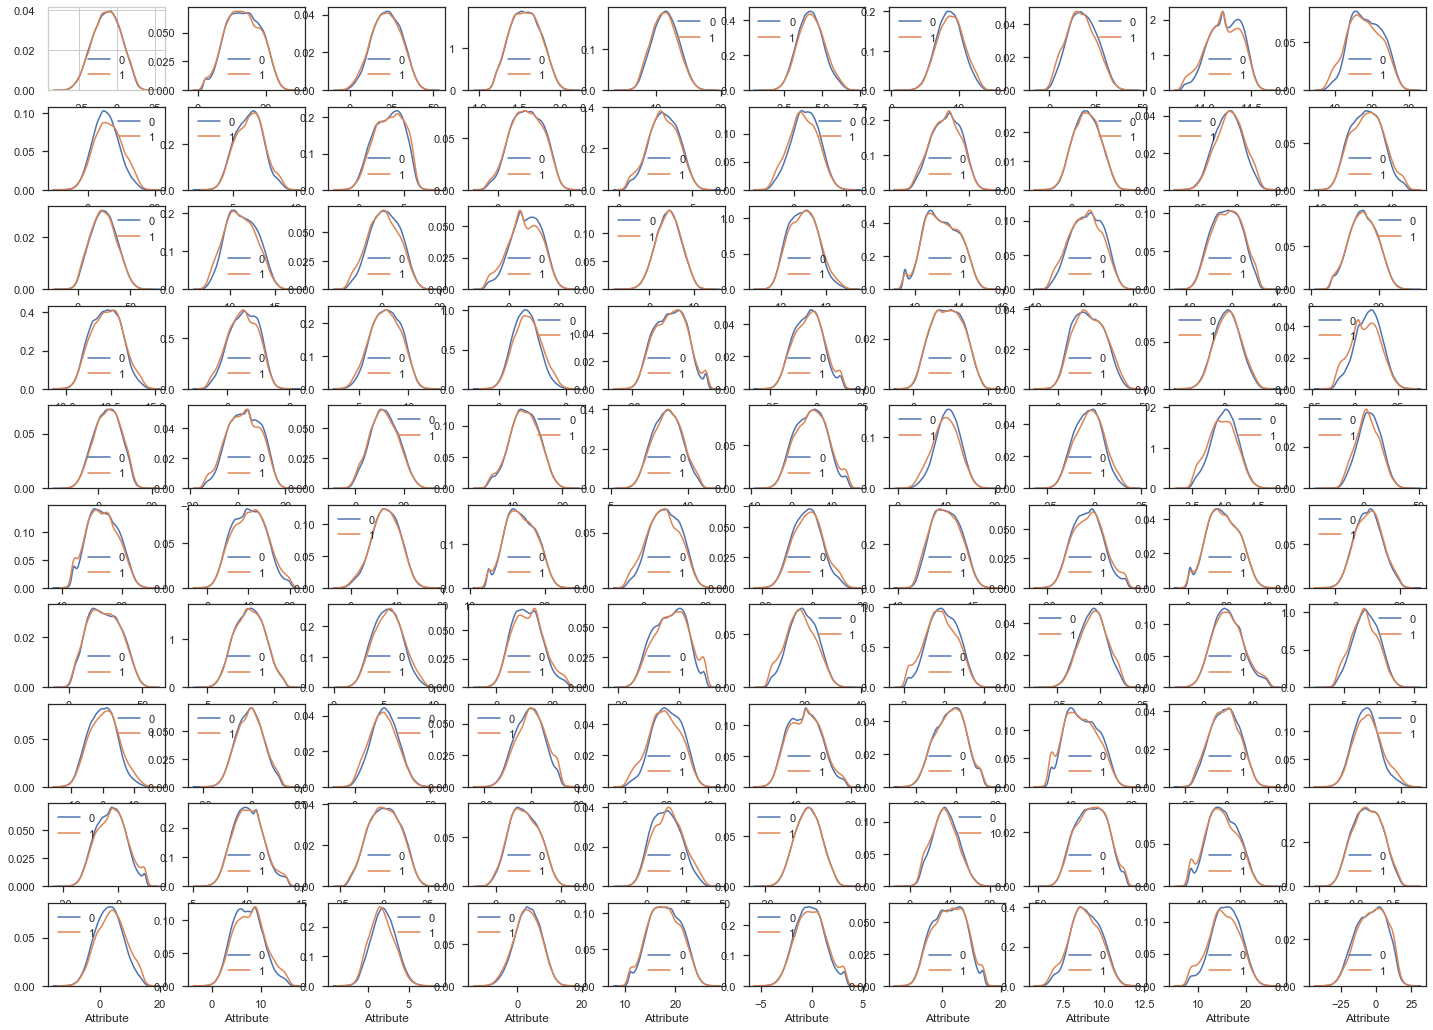

In [12]:
#train attributes from 102 to 203
train_attributes=train.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

###### Findings:
* As you can see in the figure most variables either very closely, or somewhat imitate the normal distribution.
*Variables like var_3, var_4, var_10, var_11,var_171,var_185 etc follow same distribution for both the classes of target
*Variables like var_0, var_1,var_2, var_9, var_180, var_98 etc follow different distribution for both the classes of target

###### Predictor variables in test dataset 

In [13]:
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

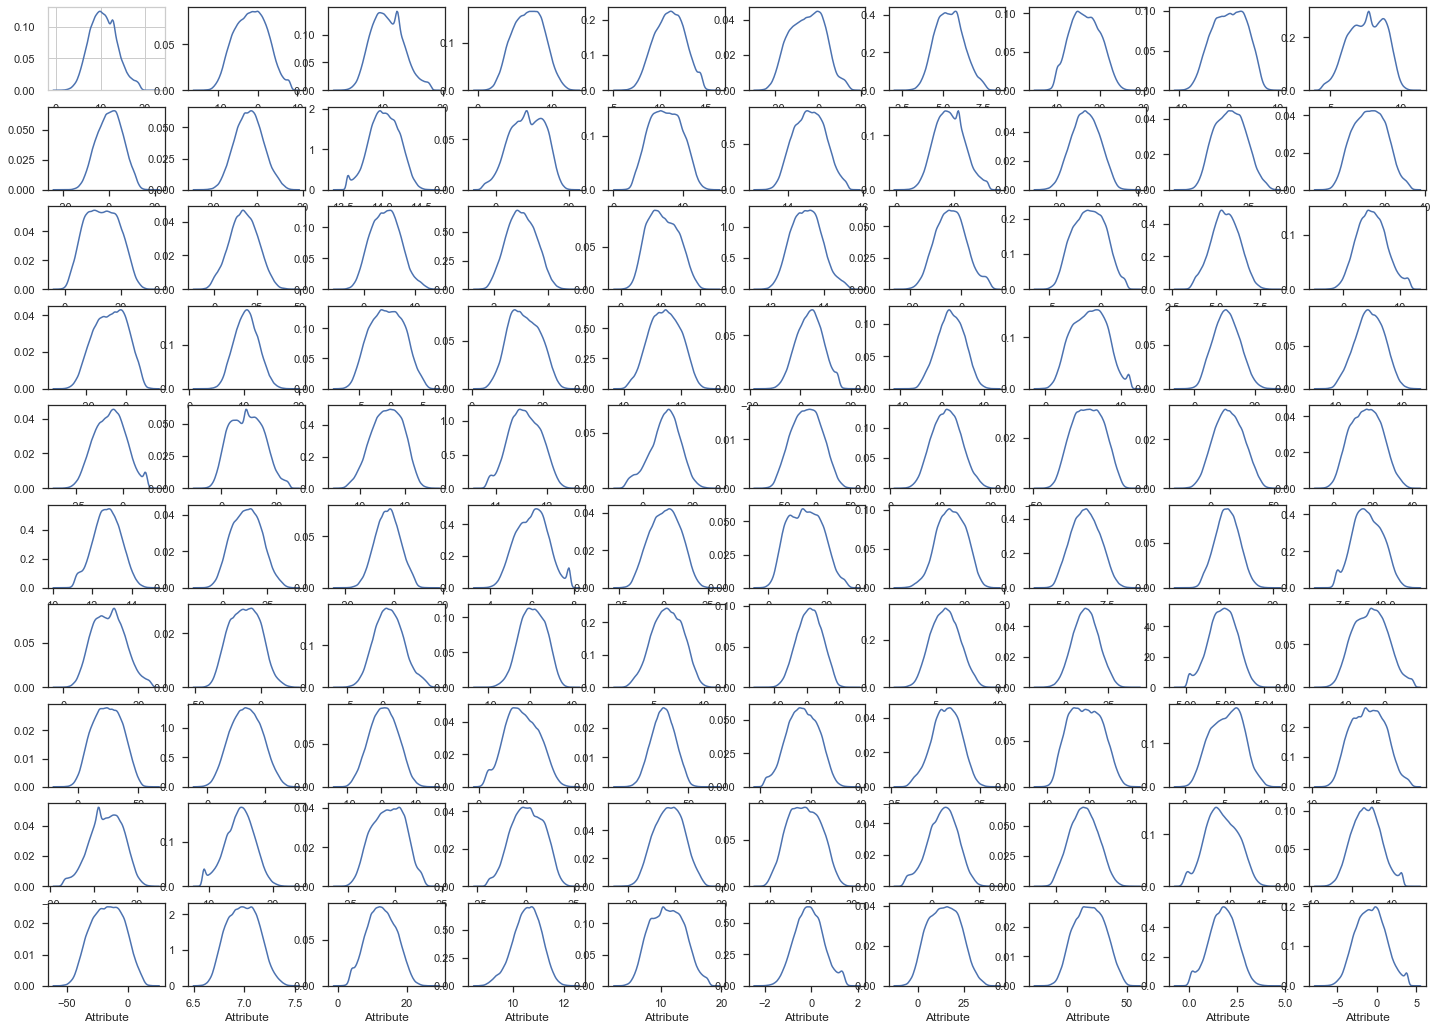

In [15]:
#test attribiutes from 1 to 101
test_attributes=test.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

<Figure size 432x288 with 0 Axes>

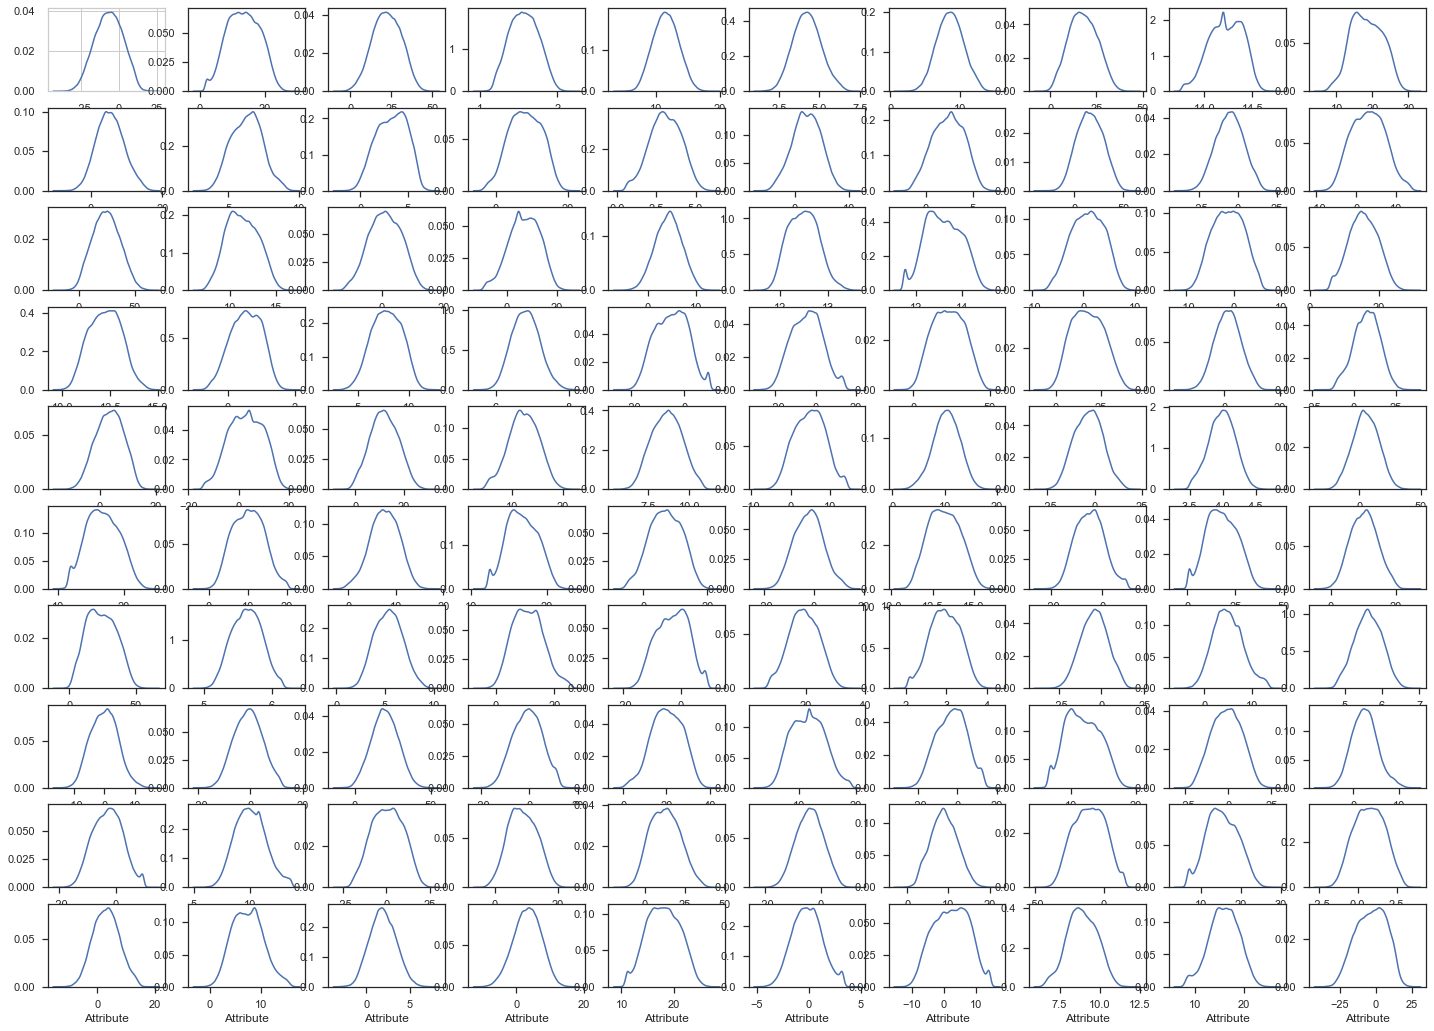

In [14]:
#test attributes from 101 to 202
test_attributes=test.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)

###### Let us look distribution of mean values per rows and columns in train and test dataset

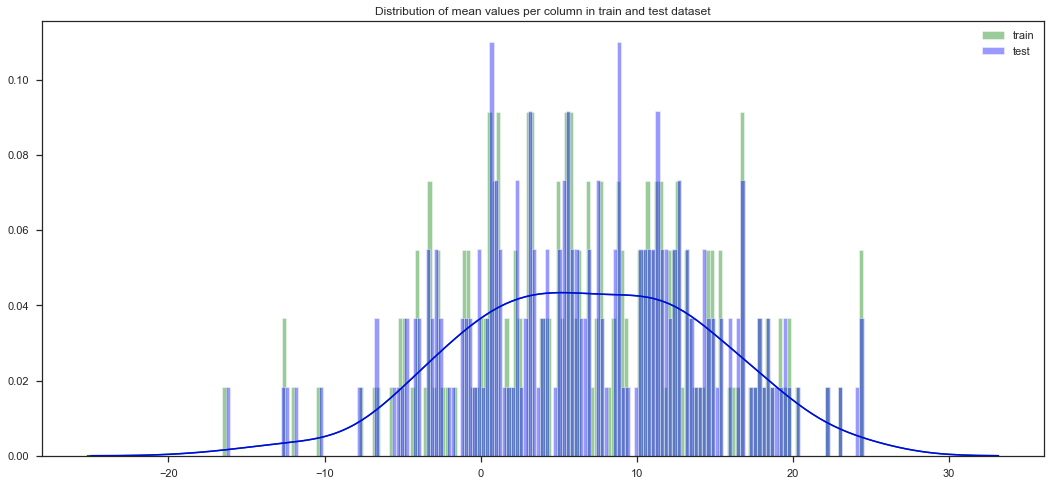

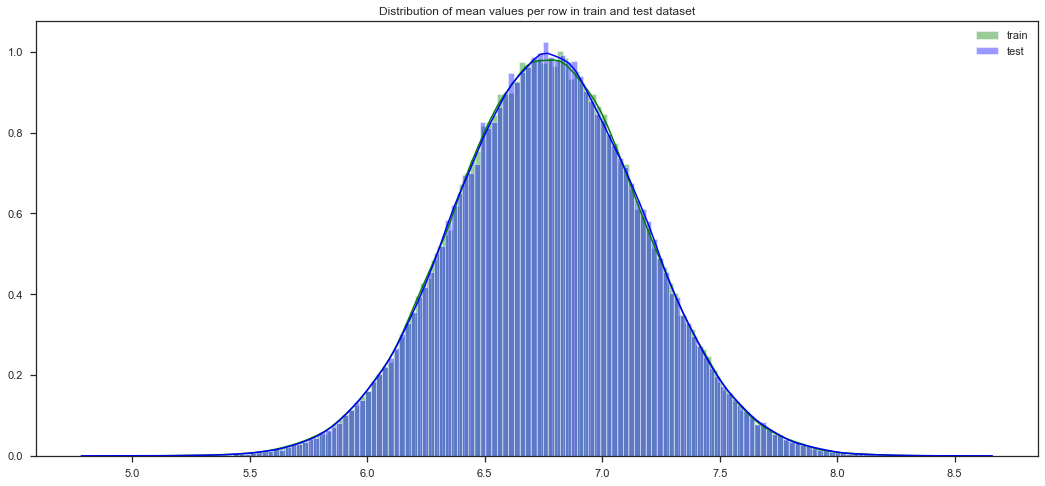

In [16]:
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train.columns.values[2:202]
#test attributes
test_attributes=test.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train[train_attributes].mean(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train[train_attributes].mean(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test[test_attributes].mean(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()

###### Let us look distribution of standard deviation(std) values per rows and columns in train and test dataset

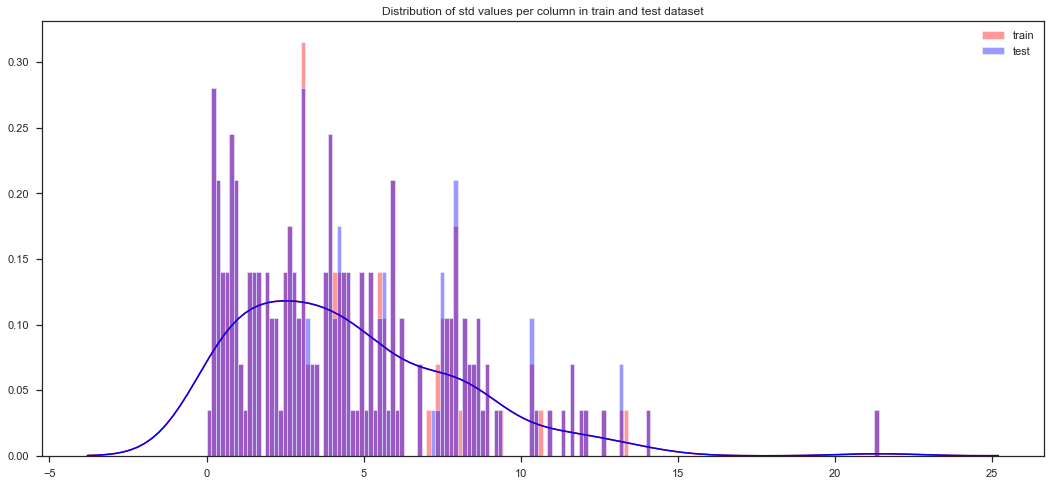

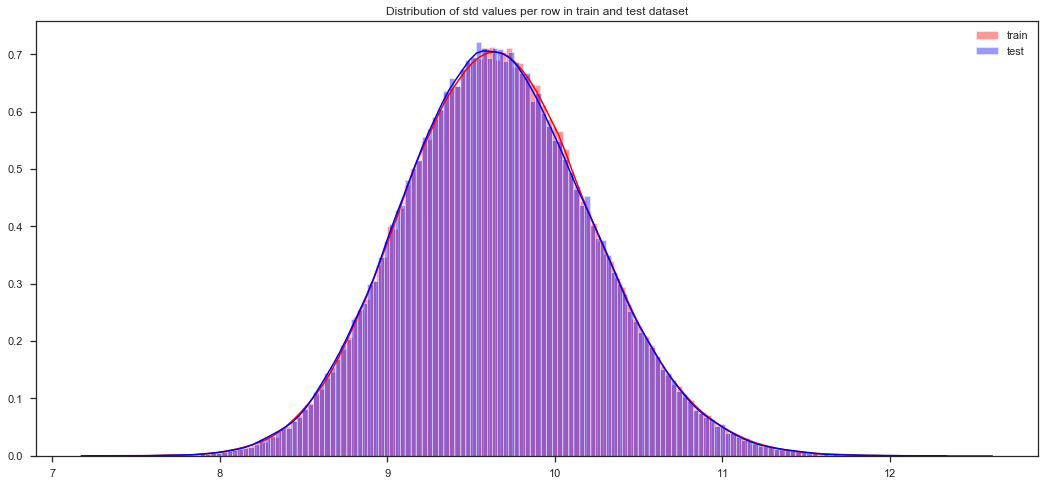

In [17]:
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train.columns.values[2:202]
#test attributes
test_attributes=test.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()

###### Let us look distribution of skewness per rows and columns in train and test dataset

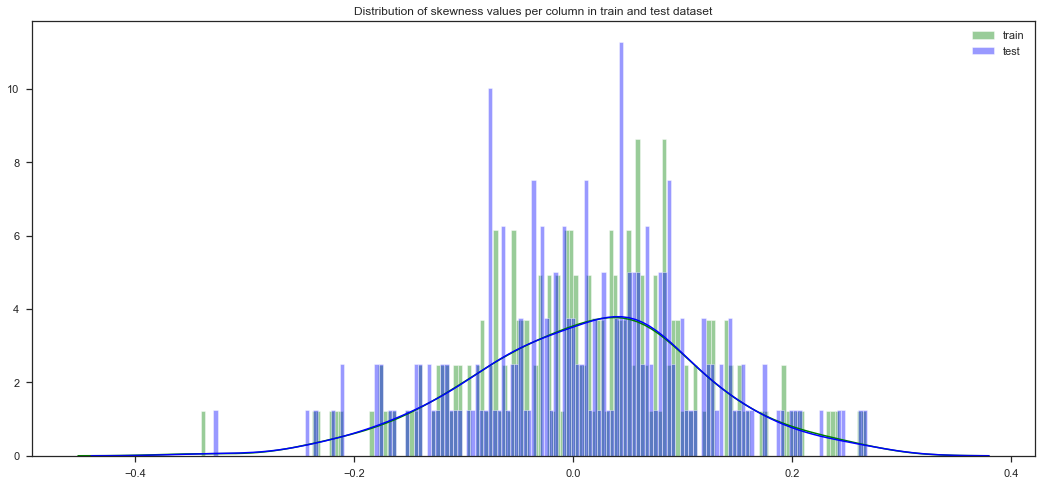

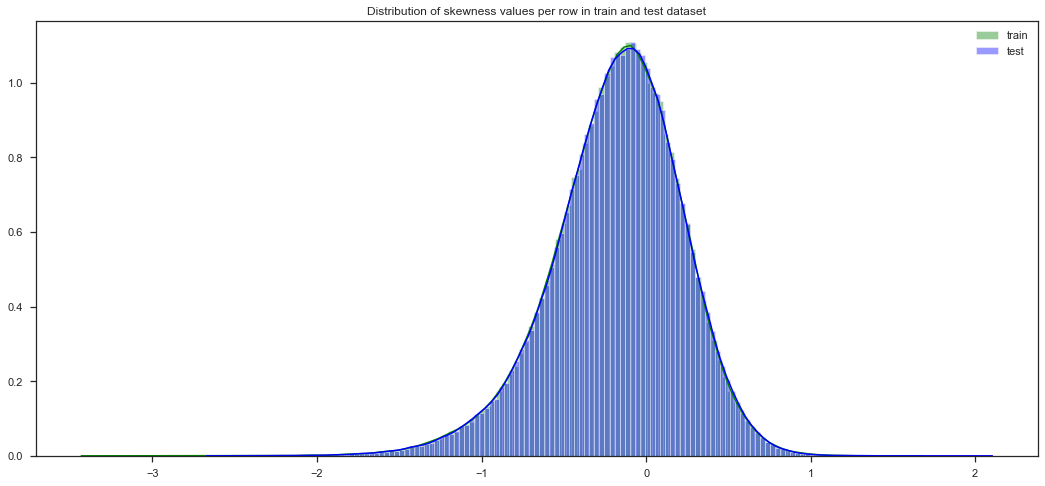

In [18]:
#Distribution of skew values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train.columns.values[2:202]
#test attributes
test_attributes=test.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()

##### Let us look distribution of Kurtosis per rows and columns in train and test dataset

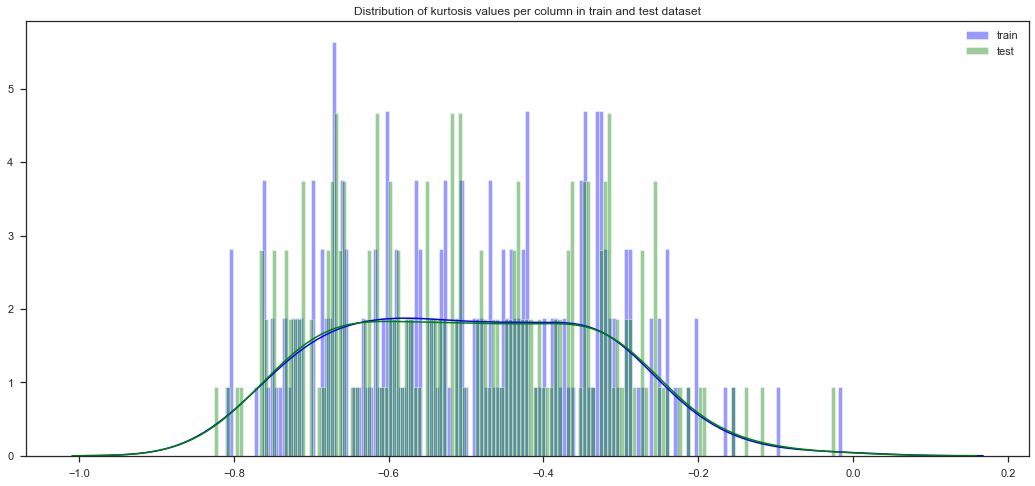

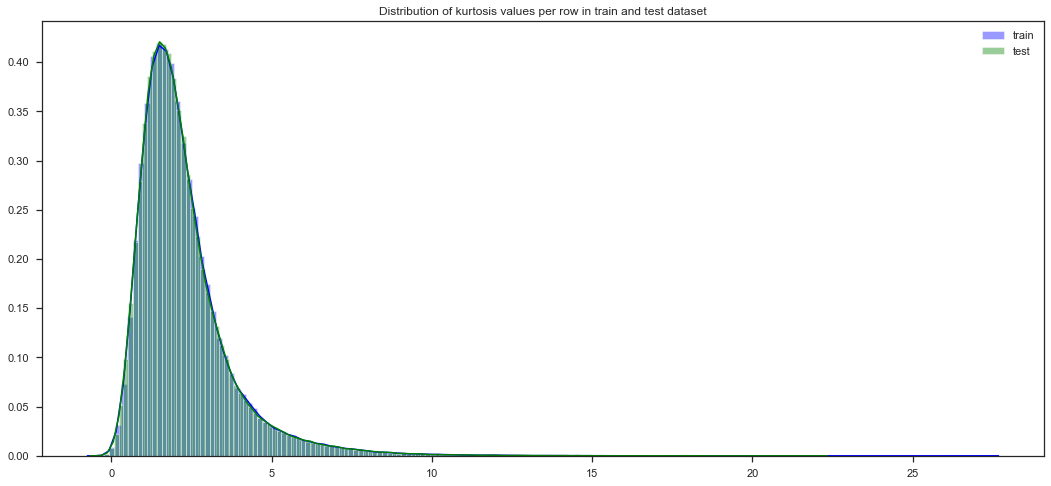

In [19]:
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train.columns.values[2:202]
#test attributes
test_attributes=test.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test[test_attributes].kurtosis(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test[test_attributes].kurtosis(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

### Missing Value Analysis

In [20]:
missingvalue_train=pd.DataFrame(train.isnull().sum())
missingvalue_test=pd.DataFrame(test.isnull().sum())

print (missingvalue_train)
print (missingvalue_test)

         0
ID_code  0
target   0
var_0    0
var_1    0
var_2    0
var_3    0
var_4    0
var_5    0
var_6    0
var_7    0
var_8    0
var_9    0
var_10   0
var_11   0
var_12   0
var_13   0
var_14   0
var_15   0
var_16   0
var_17   0
var_18   0
var_19   0
var_20   0
var_21   0
var_22   0
var_23   0
var_24   0
var_25   0
var_26   0
var_27   0
...     ..
var_170  0
var_171  0
var_172  0
var_173  0
var_174  0
var_175  0
var_176  0
var_177  0
var_178  0
var_179  0
var_180  0
var_181  0
var_182  0
var_183  0
var_184  0
var_185  0
var_186  0
var_187  0
var_188  0
var_189  0
var_190  0
var_191  0
var_192  0
var_193  0
var_194  0
var_195  0
var_196  0
var_197  0
var_198  0
var_199  0

[202 rows x 1 columns]
         0
ID_code  0
var_0    0
var_1    0
var_2    0
var_3    0
var_4    0
var_5    0
var_6    0
var_7    0
var_8    0
var_9    0
var_10   0
var_11   0
var_12   0
var_13   0
var_14   0
var_15   0
var_16   0
var_17   0
var_18   0
var_19   0
var_20   0
var_21   0
var_22   0
var_23   0
var_24  

As from above analysis, there are no missing values in train or test data

### Outlier Analysis

In [21]:
def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

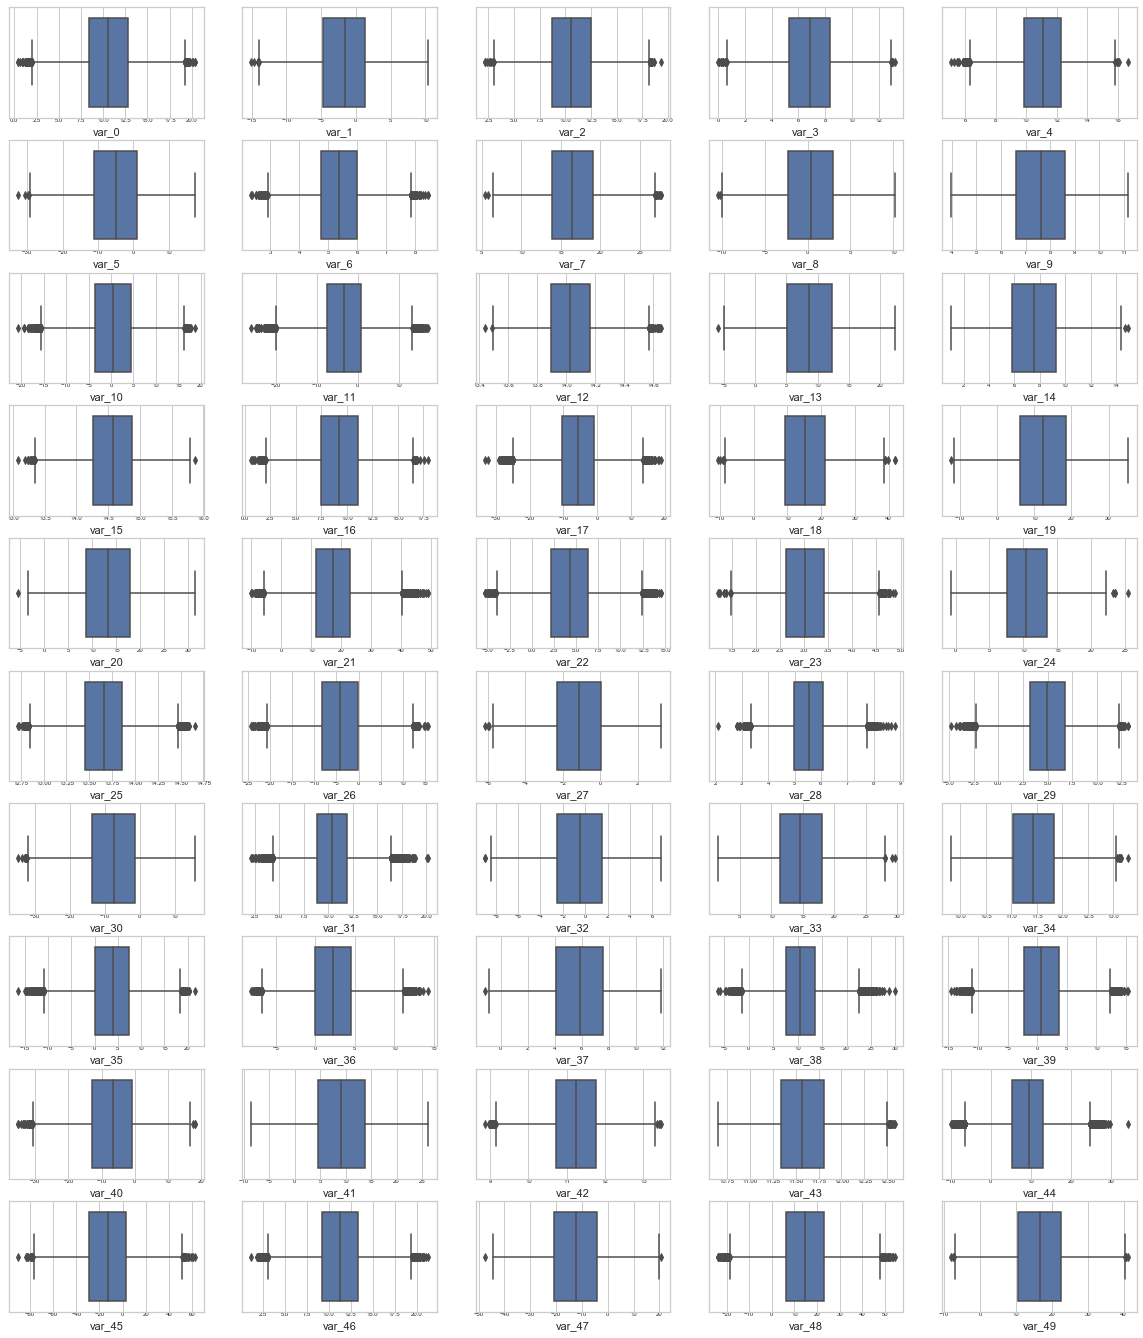

In [22]:
features = train.columns.values[2:52]
plot_feature_boxplot(train, features)
#From var_0 to var_49

<Figure size 432x288 with 0 Axes>

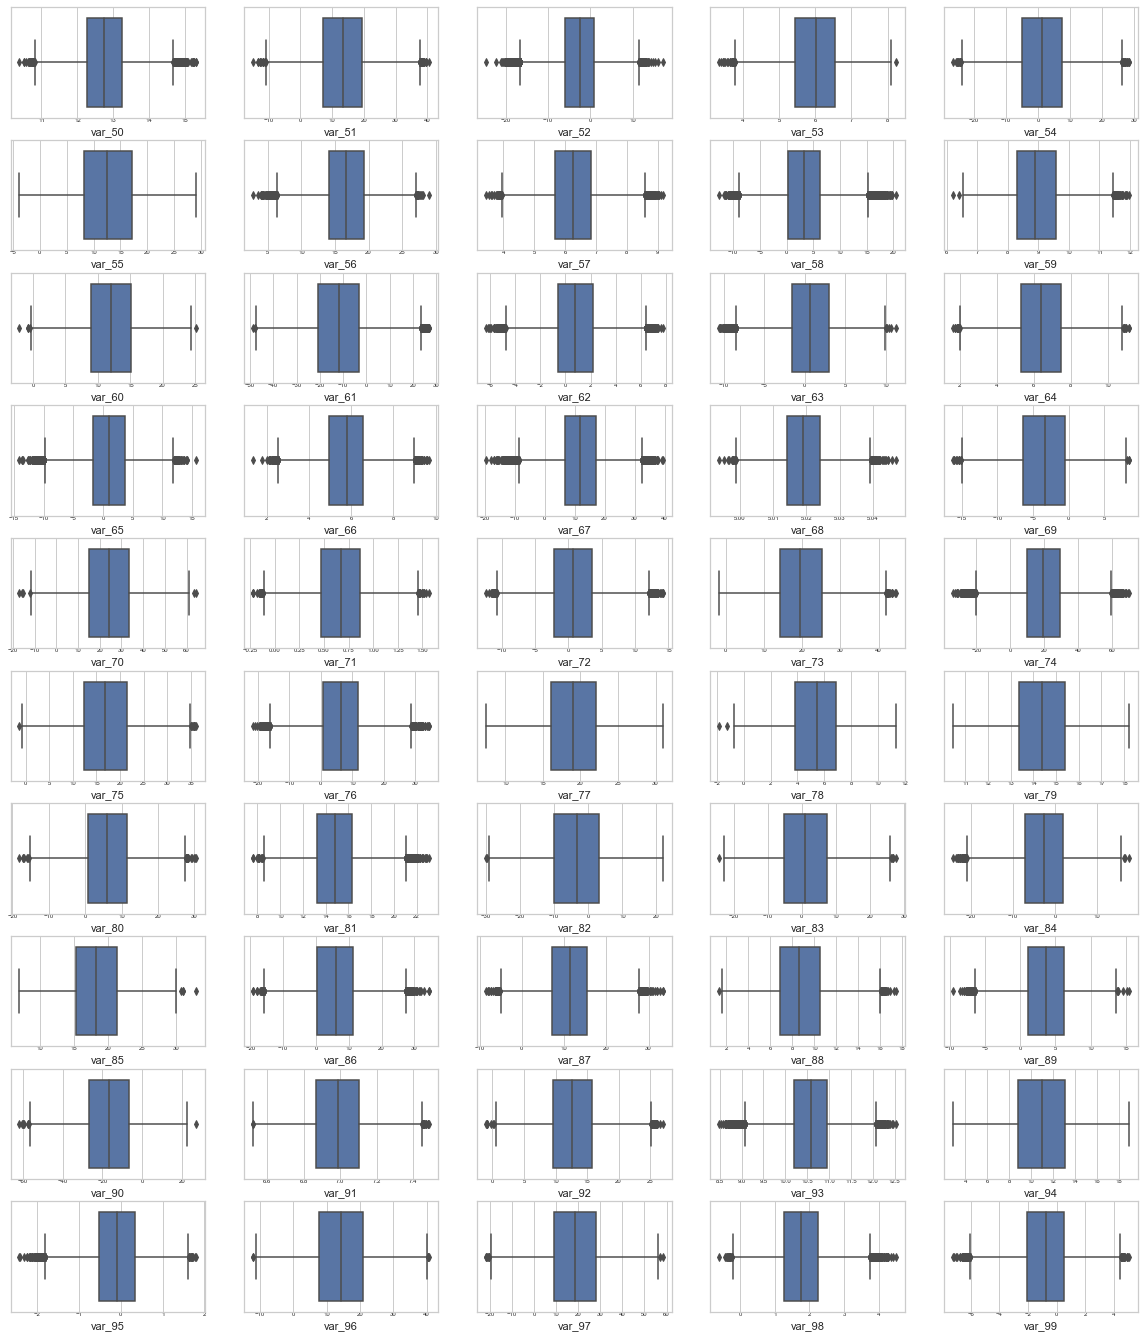

In [23]:
features = train.columns.values[52:102]
plot_feature_boxplot(train, features)
#From var_50 to var_99

<Figure size 432x288 with 0 Axes>

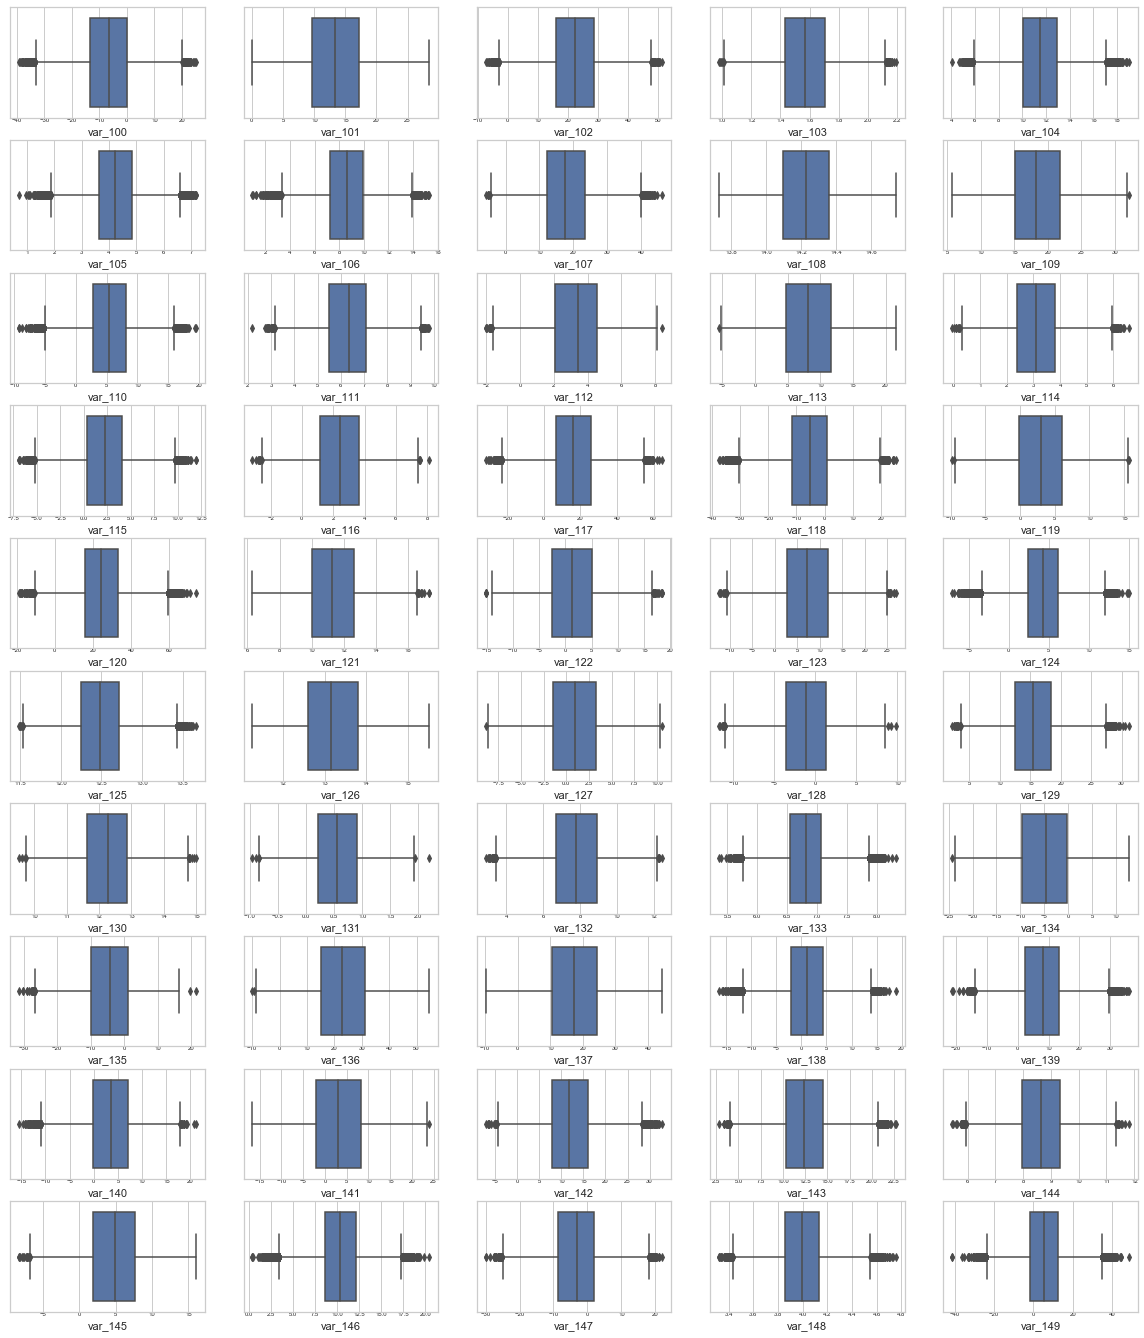

In [30]:
features = train.columns.values[102:152]
plot_feature_boxplot(train, features)
#From var_100 to var_149

<Figure size 432x288 with 0 Axes>

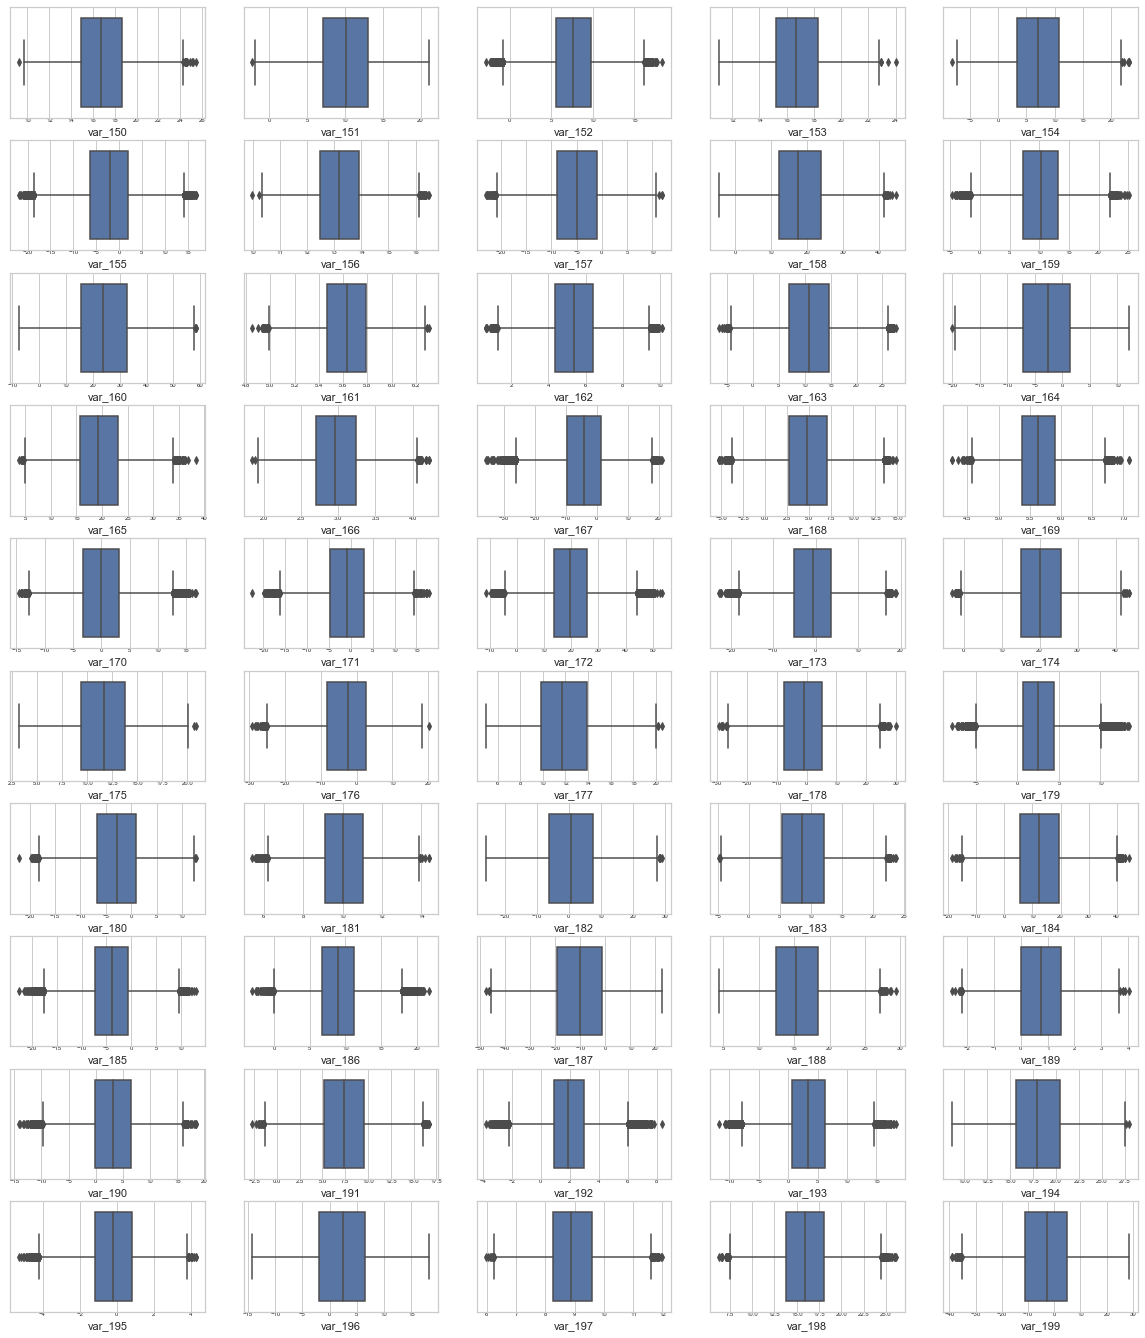

In [24]:
features = train.columns.values[152:202]
plot_feature_boxplot(train, features)
#From var_150 to var_199

In [25]:
train_outliers=train

In [26]:
Q1 = train_outliers.quantile(0.25)
Q3 = train_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

target      0.000000
var_0       4.304350
var_1       6.098650
var_2       3.794225
var_3       3.070025
var_4       2.377950
var_5      12.125150
var_6       1.235300
var_7       5.159100
var_8       5.255700
var_9       1.965625
var_10      7.977875
var_11      8.363425
var_12      0.270200
var_13      7.201975
var_14      3.488550
var_15      0.611700
var_16      3.603625
var_17      9.665450
var_18     11.835375
var_19     12.156825
var_20      9.251600
var_21     11.538050
var_22      4.110800
var_23      0.769700
var_24      5.866600
var_25      0.407300
var_26      8.231525
var_27      2.323525
var_28      1.101600
             ...    
var_170     6.354900
var_171     7.677150
var_172    12.175950
var_173     8.629425
var_174    10.576625
var_175     4.373900
var_176    11.090900
var_177     4.122625
var_178    12.734450
var_179     3.765550
var_180     7.670100
var_181     1.926600
var_182    13.563600
var_183     6.704325
var_184    13.792850
var_185     6.769350
var_186     4

In [27]:
print("df.shape:",train_outliers.shape)
df_in = train_outliers[~((train_outliers < (Q1 - 1.5 * IQR)) |(train_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = train_outliers[((train_outliers < (Q1 - 1.5 * IQR)) |(train_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

df.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [26]:
df_in['target'].value_counts()

0    157999
Name: target, dtype: int64

In [28]:
df_out['target'].value_counts()

0    21903
1    20098
Name: target, dtype: int64

In [29]:
train_outliers['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

All the varaibles with target "1" are as considered outliers, In imbalanced class data, there is no requirement for outlier analysis

### Correlation Analysis

##### Correlation analysis for variables in train data

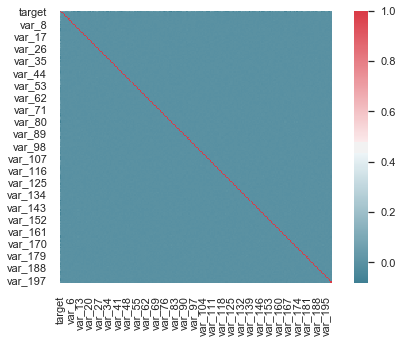

In [31]:
train_corr=train.loc[:] 

f, ax = plt.subplots(figsize=(7, 5))
corr = train_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Findings: As from the heatmap it can be seen that the varaibles in train dataset are independent of each other

##### Correlation analysis for variables in test data

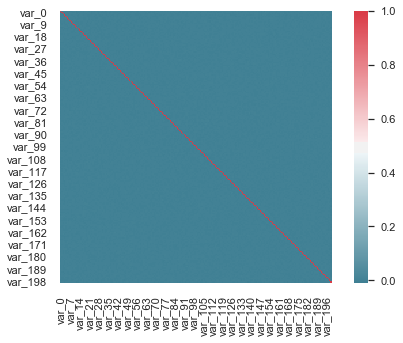

In [32]:
test_corr=test.loc[:]

f, ax = plt.subplots(figsize=(7, 5))
corr = test_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Findings: As from the heatmap it can be seen that the varaibles in test dataset are independent of each other

In [33]:
#Correlations in train attributes
train_attributes=train.columns.values[2:202]
train_correlations=train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844


In [34]:
#Correlations in test attributes
test_attributes=test.columns.values[1:201]
test_correlations=test[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868


Findings: Clearly from the above correlation analysis we can see that the varaibles in train and test data have correlation values very less (<0.05)indicating they are independent of each other

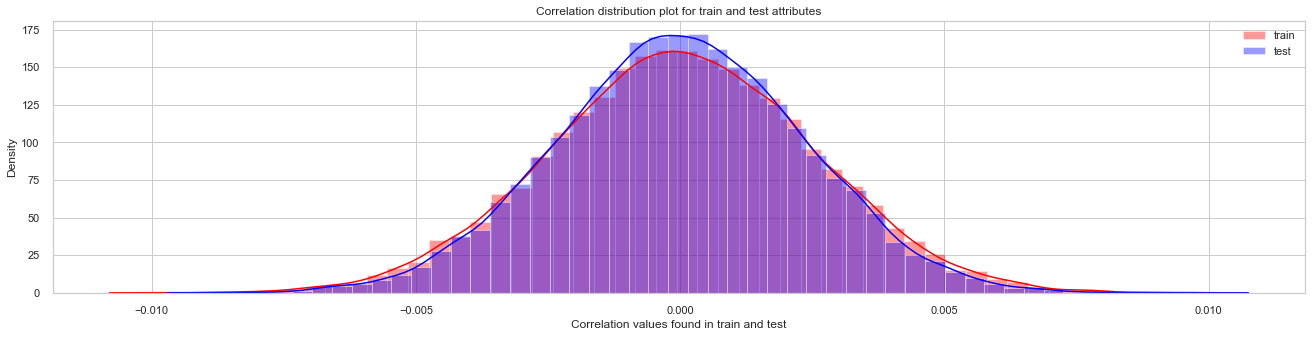

In [35]:
#Correlations in train data
train_correlations=train[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

### Feature Engineering

### Permutation importance

Let's look at the permutation importance method of variable importance that changes the order of a column and measures the loss of accuracy of the model to estimate the importance of the feature set. Instead of dripping a feature like in a random forest method, the feature column in randomized. Intuitively, we should see same/similar set of features from both the techniques, ordered differently, and the performance shouldn't differ drastically. We'll use eli5 to compute importance.

In [38]:
#training and testing data
X=train.drop(columns=['ID_code','target'],axis=1)
test=test.drop(columns=['ID_code'],axis=1)
y=train['target']

In [39]:
#Split the training data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


#### Random Forest Classifier

In [40]:
#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                      

In [44]:
#Important features
eli5.show_weights(perm_imp,feature_names=X_valid.columns.tolist(),top=200)

Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


Findings:
* The variables in green rows have positive impact on our prediction
* The variables in white rows have no impact on our prediction
* The variables in red rows have negative impact on our prediction

### Handling of imbalanced data

## Logistic Regression using Stratified K-fold Cross Validation

###### Split the train data using StratefiedKFold cross validator

In [45]:
#Training data
X=train.drop(['ID_code','target'],axis=1)
Y=train['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index in cv.split(X,Y):
    X_train, X_valid=X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid=Y.iloc[train_index], Y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160001, 200)
Shape of X_valid : (39999, 200)
Shape of y_train : (160001,)
Shape of y_valid : (39999,)


###### Logistic Regression model

In [46]:
#Logistic regression model
lr_model=LogisticRegression(random_state=42)
#fitting the lr model
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#Accuracy of the model
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of the lr_model :',lr_score)

Accuracy of the lr_model : 0.9148755320279248


###### Cross validation prediction of lr_model

In [49]:
#Cross validation prediction
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.911647852856607


###### Confusion matrix

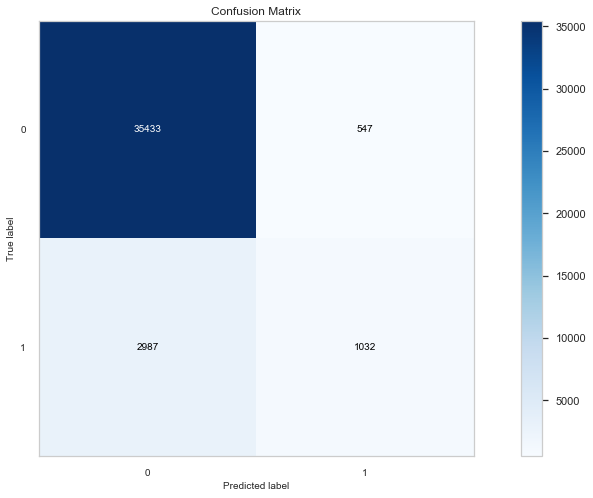

In [50]:
#Confusion matrix
cm=confusion_matrix(y_valid,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_valid,cv_predict,normalize=False,figsize=(15,8))

#### Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve

ROC score : 0.6207887015553276


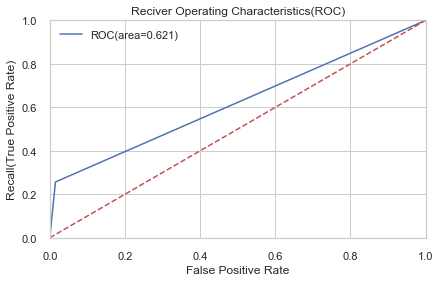

AUC: 0.6207887015553276


In [51]:
#ROC_AUC score
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

When we compare the roc_auc_score and model accuracy , model is not performing well on imbalanced data.

###### Classification report

In [52]:
#Classification report
scores=classification_report(y_valid,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35980
           1       0.65      0.26      0.37      4019

    accuracy                           0.91     39999
   macro avg       0.79      0.62      0.66     39999
weighted avg       0.90      0.91      0.89     39999



As from the table we can see that the f1 score is high for number of customers those who will not make a transaction then the who will make a transaction. So, we are going to change the algorithm.

###### Model performance on test data

In [57]:
test=pd.read_csv("test.csv")

In [58]:
#Predicting the model
X_test=test.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]


Oversample minority class:
It can be defined as adding more copies of minority class.
It can be a good choice when we don't have a ton of data to work with.
Drawback is that we are adding information.This may leads to overfitting and poor performance on test data.

Undersample majority class:
It can be defined as removing some observations of the majority class.
It can be a good choice when we have a ton of data -think million of rows.
Drawback is that we are removing information that may be valuable.This may leads to underfitting and poor performance on test data.

Both Oversampling and undersampling techniques have some drawbacks. So, we are not going to use this models for this problem and also we will use other best algorithms.

### Synthetic Minority Oversampling Technique(SMOTE)

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.We'll use SMOTE method to generate some data points in the minority class and see if the model improves

In [59]:
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42, ratio=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

Let us see how baseline logistic regression model performs on synthetic data points

In [60]:
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7986131376717944


Cross validation prediction of smoth_model

In [62]:
#Cross validation prediction
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8006114508060034


###### Confusion matrix

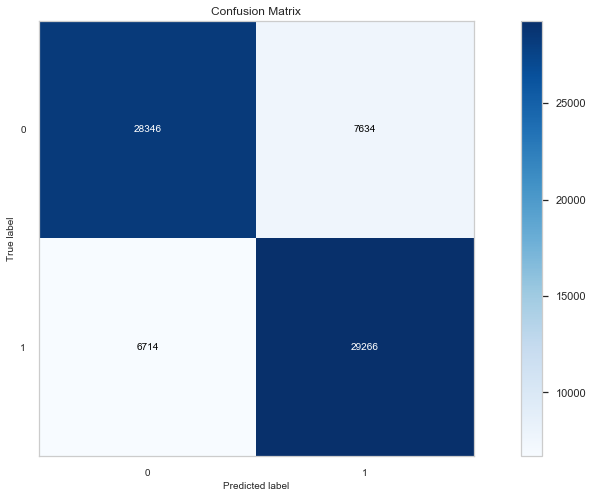

In [63]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_pred,normalize=False,figsize=(15,8))

#### Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve

ROC score : 0.8006114508060033


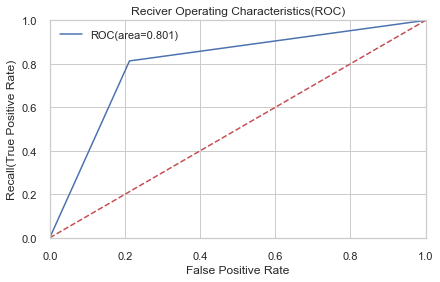

AUC: 0.8006114508060033


In [64]:
#ROC_AUC score
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

#### Classification report

In [65]:
#Classification report
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



#### Model performance on test data

In [67]:
#Predicting the model
X_test=test.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]


SMOTE model is performing better than the logistic regression

###### It can be seen that SMOTE model is performing better than Logistic regression

### LightGBM:

LightGBM is a gradient boosting framework that uses tree based learning algorithms. We are going to use LightGBM model.

Let us build LightGBM model

In [68]:
#Training the model
#training data
lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

###### choosing of hyperparameters

In [69]:
#Selecting best hyperparameters by tuning of different parameters
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [70]:
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.938996	valid_1's auc: 0.885963
[2000]	training's auc: 0.958629	valid_1's auc: 0.890769
[3000]	training's auc: 0.972001	valid_1's auc: 0.89195
[4000]	training's auc: 0.981625	valid_1's auc: 0.892447
[5000]	training's auc: 0.988357	valid_1's auc: 0.892444
[6000]	training's auc: 0.992858	valid_1's auc: 0.892633
[7000]	training's auc: 0.995834	valid_1's auc: 0.892332
[8000]	training's auc: 0.997652	valid_1's auc: 0.89205
[9000]	training's auc: 0.99874	valid_1's auc: 0.891803
[10000]	training's auc: 0.999366	valid_1's auc: 0.891481
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.999366	valid_1's auc: 0.891481


###### Training the lgbm model

#### lgbm model performance on test data

In [71]:
#predict the model
X_test=test.drop(['ID_code'],axis=1)
#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.32983774 0.35499097 0.33798803 ... 0.01180197 0.25520441 0.20054849]
[0 0 0 ... 0 0 0]


Conclusion :
We tried model with logistic regression,smote and lightgbm. But lightgbm model is performing well on imbalanced data compared to other models based on scores of roc_auc_score.

###### Let us plot the important features

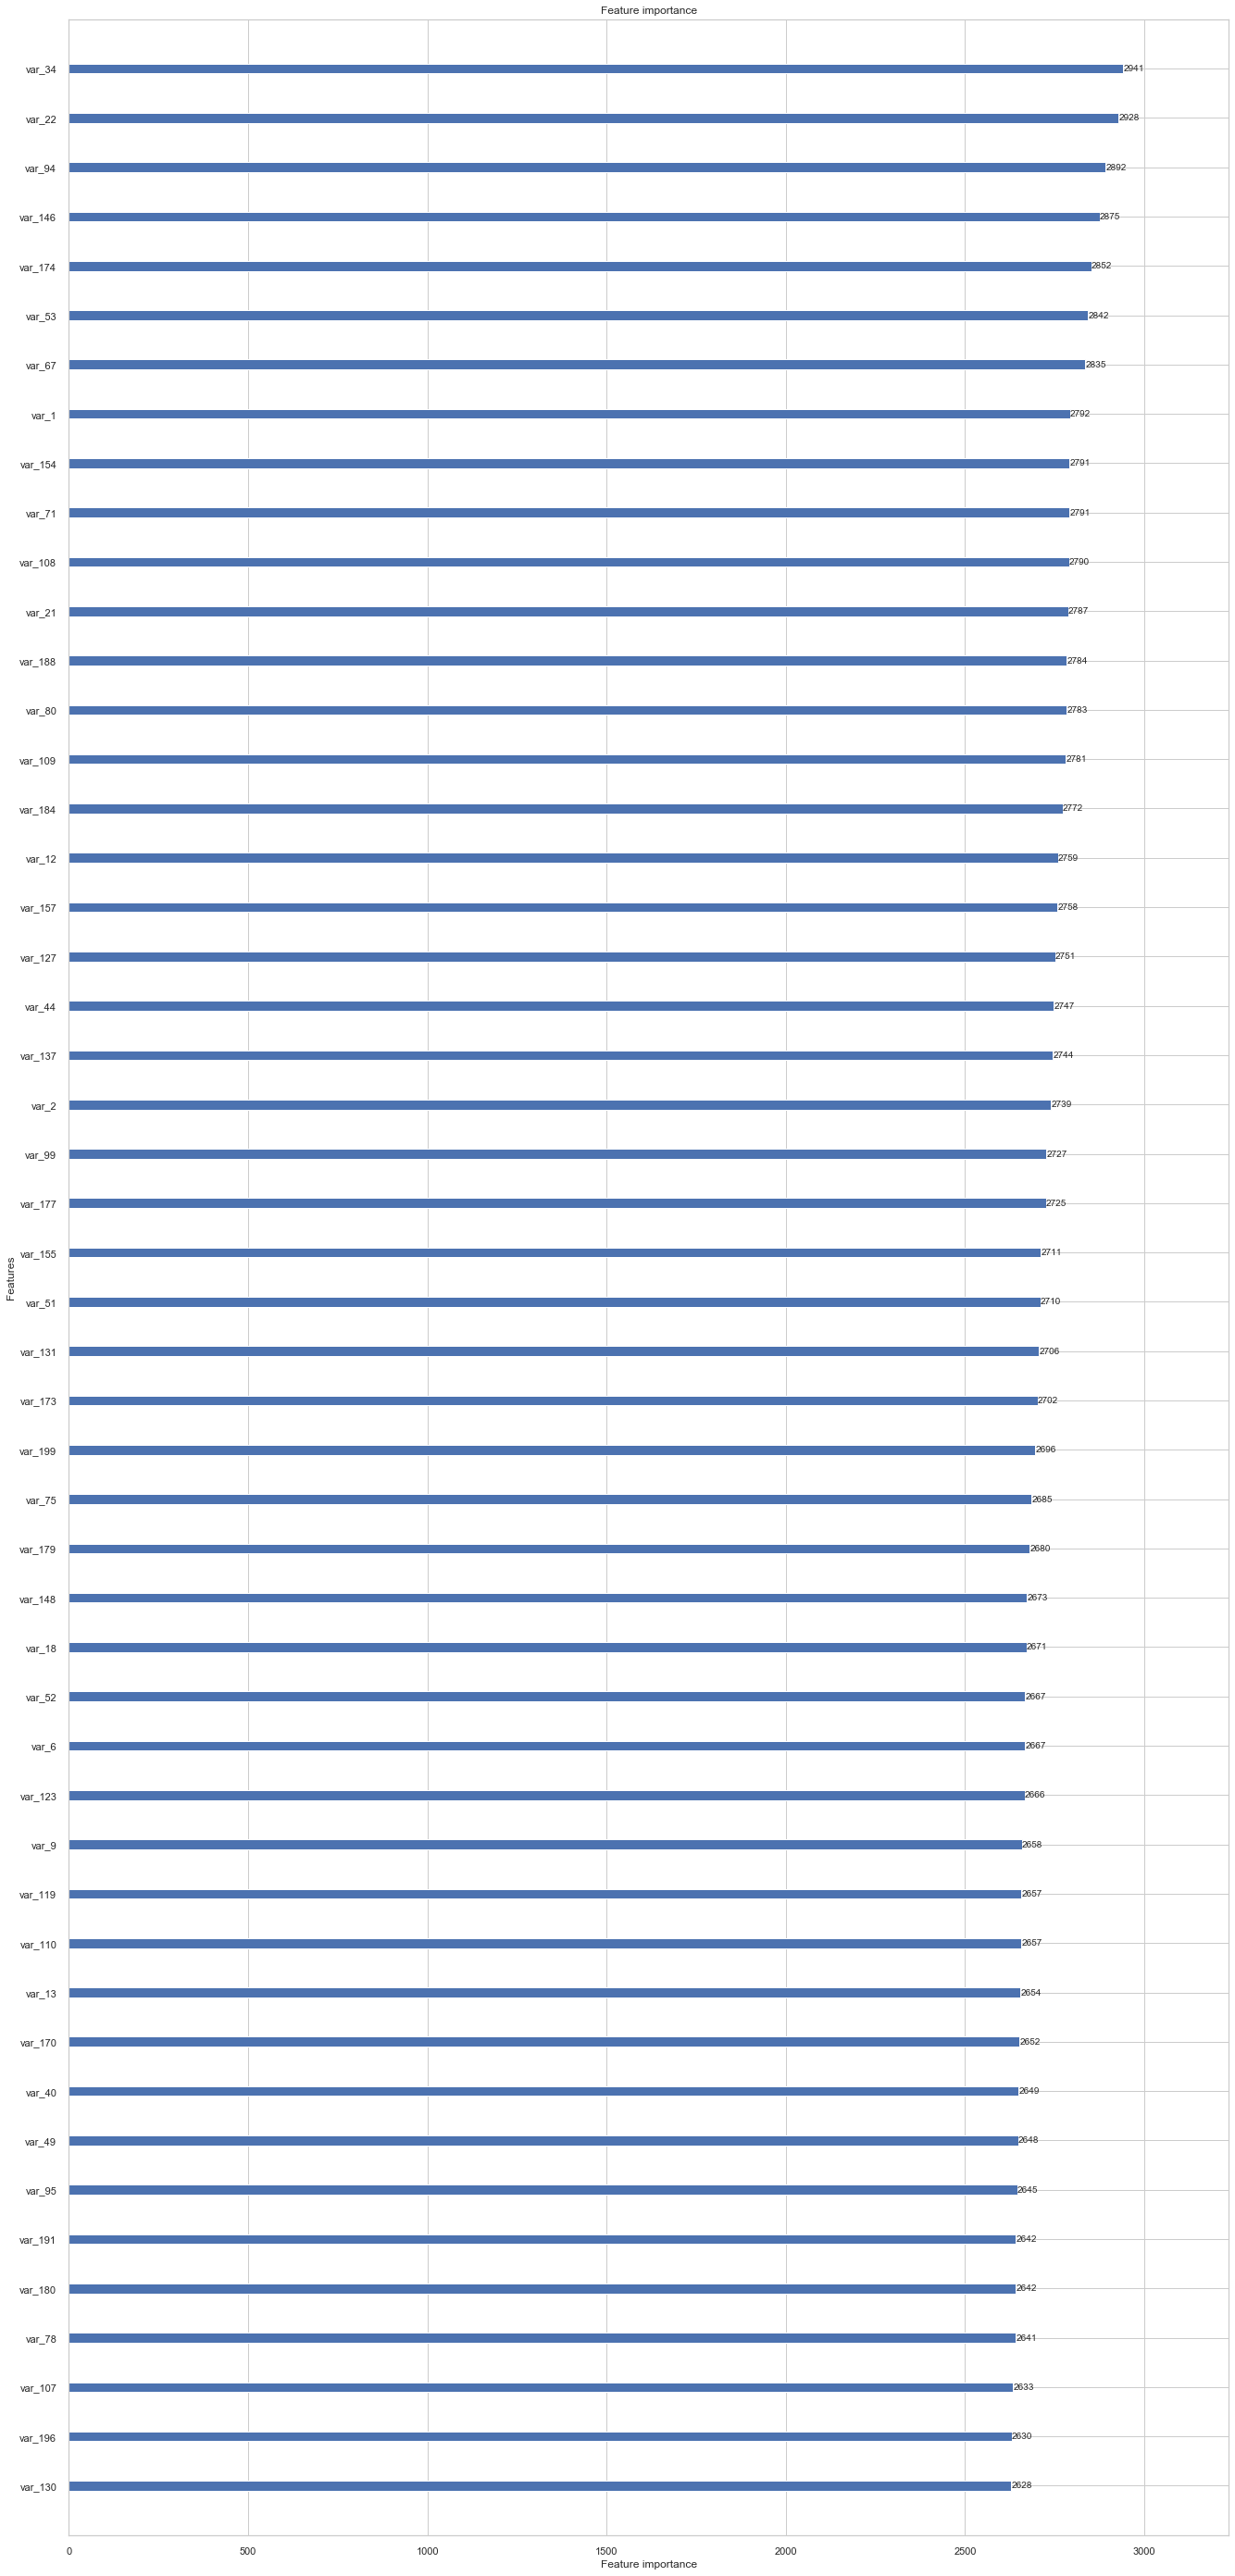

In [72]:
#plot the important features
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [73]:
#final submission
submission_df=pd.DataFrame({'ID_code':test['ID_code'].values})
submission_df['lgbm_predict_prob']=lgbm_predict_prob
submission_df['lgbm_predict']=lgbm_predict
submission_df.to_csv('submission.csv',index=False)
submission_df.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.329838,0
1,test_1,0.354991,0
2,test_2,0.337988,0
3,test_3,0.436098,0
4,test_4,0.102491,0


### Model explaining

##### Partial dependency of features

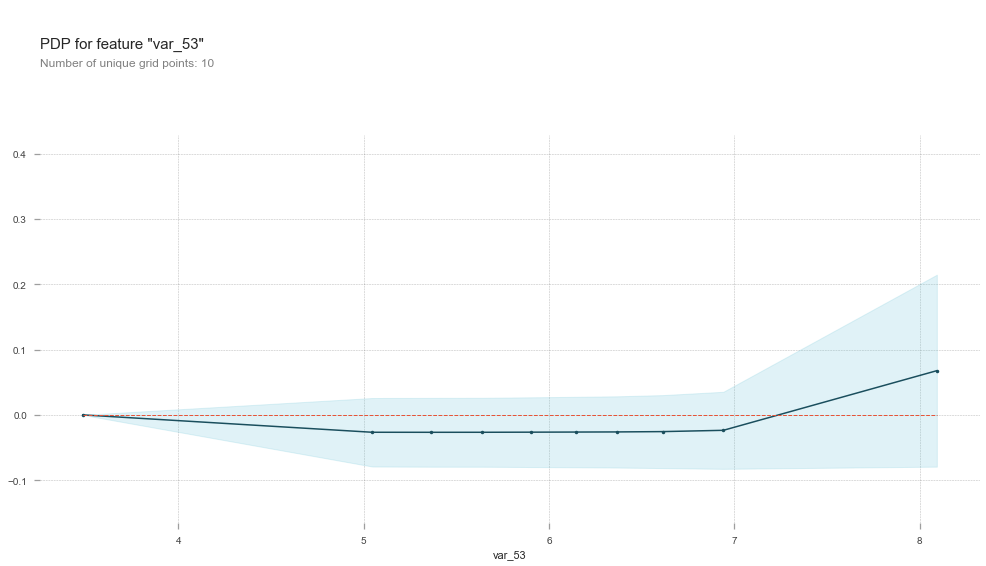

In [74]:
#Create the data we will plot 'var_53'
features=[v for v in X_valid.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_53')
#plot feature "var_53"
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

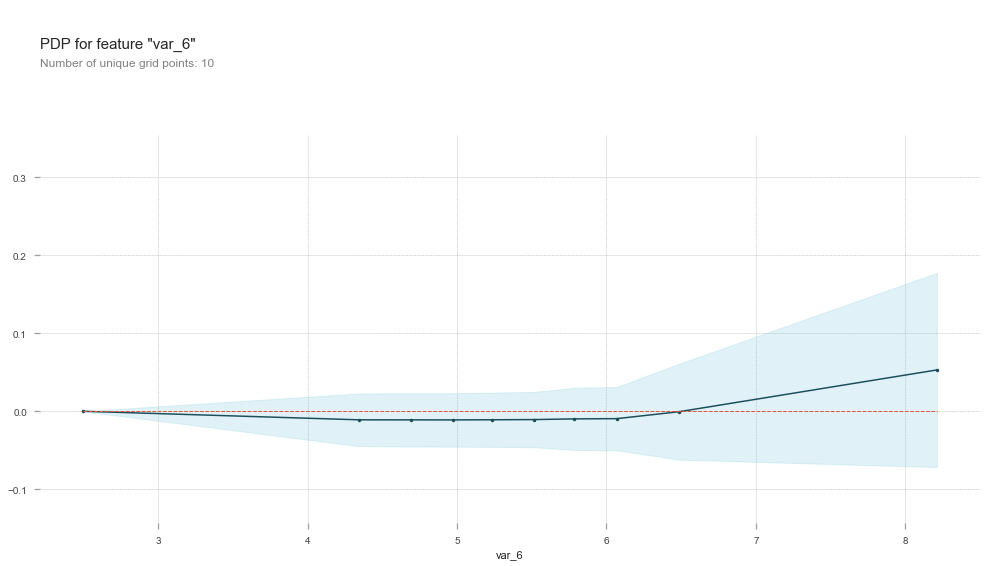

Wall time: 5.8 s


In [75]:
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_6')
#plot feature "var_6"
pdp.pdp_plot(pdp_data,'var_6')
plt.show()